In [2]:
import torch
#import torch.nn as nn
#import torch.functional as F
import torchvision.datasets as dset
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor

#import torchvision.transforms as transforms

input_testdata = dset.MNIST( root="D:\Project\MNIST", train = True, transform = ToTensor(),
                          download= True)


In [35]:
import matplotlib.pyplot as plt

trainloader = torch.utils.data.DataLoader(input_testdata, batch_size=1, shuffle=True)
ny,nx=28,28

In [21]:
import numpy as np
from skimage.transform import radon,rescale,resize

theta = np.linspace(0.,180.,14, endpoint=False)
sinogram=[]
noise_level = 0.02
for i,ele in enumerate(trainloader):
    image,label = ele
    image = image[0].numpy().squeeze()
    sinogram.append((radon(image, theta=theta))+noise_level*np.random.randn((radon(image, theta=theta).size)))



In [32]:
sinogram2=np.stack(sinogram)
print(sinogram2.shape)

(60000, 28, 14)


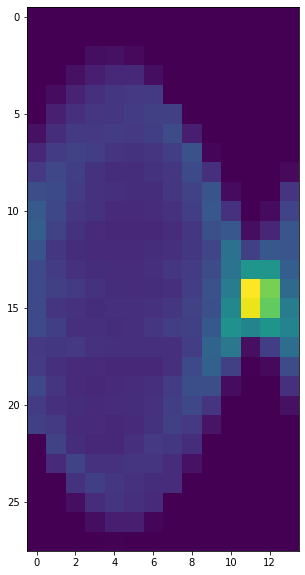

(28, 14)


In [29]:

plt.figure(figsize=(10,10))
plt.imshow(sinogram2[0])
plt.show()
print(sinogram2[0].shape)

In [33]:
def getRadonMatrix(theta,ny,nx):
    colum_of_A = radon(np.zeros((ny,nx)), theta=theta)  #  this is just to know the size of this
    A = np.zeros((colum_of_A.size,nx*ny))
    for i in range(ny):
        for j in range(nx):
            basis_vec = np.zeros((ny,nx))
            basis_vec[i,j] = 1
            colum_of_A = radon(basis_vec, theta=theta)
            A[:,j+i*nx] = np.reshape(colum_of_A, colum_of_A.size)
            
    return A

d:\Project\Env\lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


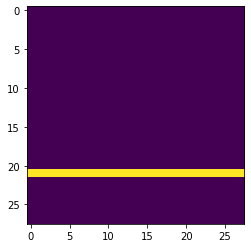

In [36]:
A = getRadonMatrix(theta,ny,nx)
nr = 105
plt.imshow(np.reshape(A[nr,:], (ny,nx)))
plt.show()

In [39]:
print(A.shape[1])

784
